In [39]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [102]:
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import datetime

%matplotlib notebook

In [113]:
regions = [3,5,6,7,8,9,10] # these get data for different NHS regions

raw_data = []

for ii in regions:
    if ii < 10:
        areacode = 'E4000000' + str(ii)
    else:
        areacode = 'E400000' + str(ii)
    
    print(f'getting data for area {areacode}')
    url1 = f'https://api.coronavirus.data.gov.uk/v2/data?areaType=nhsRegion&areaCode={areacode}&metric=cumAdmissionsByAge&metric=newAdmissions&metric=cumAdmissions&format=json'
    raw = requests.get(url1)

    if raw.ok:
        raw_data.append(raw.content)
        print(f'Successful request for {areacode}, status {raw.status_code}')
    else:
        print(f'Failed request for areacode = {areacode}, status {raw.status_code}, reason {raw.reason}')

getting data for area E40000003
Successful request for E40000003, status 200
getting data for area E40000005
Successful request for E40000005, status 200
getting data for area E40000006
Successful request for E40000006, status 200
getting data for area E40000007
Successful request for E40000007, status 200
getting data for area E40000008
Successful request for E40000008, status 200
getting data for area E40000009
Successful request for E40000009, status 200
getting data for area E40000010
Successful request for E40000010, status 200


In [114]:
areas = {}

for rd in raw_data:
    data = json.loads(rd)
    dates = np.array([datetime.datetime.strptime(x['date'], '%Y-%m-%d') for x in data['body'] if x['cumAdmissions'] is not None])
    cumAdmissions = np.array([x['cumAdmissions'] for x in data['body'] if x['cumAdmissions'] is not None])
    newAdmissions = np.array([x['newAdmissions'] for x in data['body'] if x['newAdmissions'] is not None])
    asrt = np.argsort(dates)
    dates = dates[asrt]
    cumAdmissions = cumAdmissions[asrt]
    newAdmissions = newAdmissions[asrt]
    
    if data['body']:
        areas.update({data['body'][0]['areaName']: (dates, newAdmissions)})

<IPython.core.display.Javascript object>


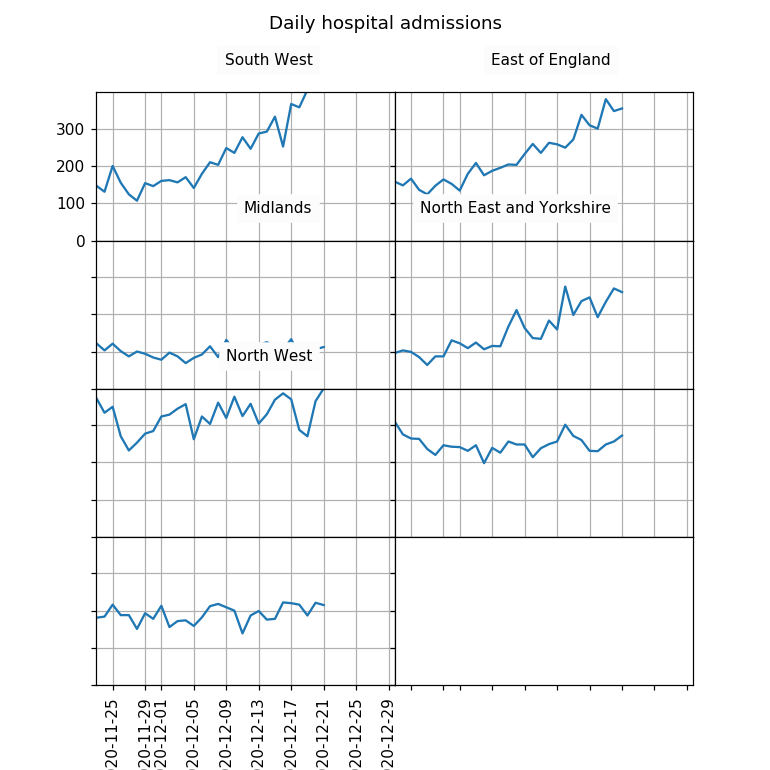

In [115]:
#plt.figure()
#plt.plot_date(dates, cumAdmissions, xdate=True)
#plt.xticks(rotation=90)
#plt.tight_layout()

abbrevs = (('Yorkshire', 'Yorks'), ('North', 'N'), ('South', 'S'), (' East', 'E'), (' West', 'W'), ('of England', ''), (' and ', '&'))

#plt.figure(figsize=(5, 10))
f, axes_list = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(7, 7))

for ii, a in enumerate(areas):
    label = a
    u, v = np.unravel_index(ii, axes_list.shape)
    ax = axes_list[u, v]
    plt.sca(ax)
    for abbr in abbrevs:
        label = label.replace(abbr[0], abbr[1])
    plt.plot_date(areas[a][0], areas[a][1], '-', xdate=True, label=label)
    plt.xticks(rotation=90)
    #plt.title(a)
    plt.ylim(0, 1000)
    xL = plt.gca().get_xlim()
    yL = plt.gca().get_ylim()
    plt.text(0.95*(xL[1]-xL[0])+xL[0], 0.9*(yL[1]-yL[0])+yL[0], a, ha='right', va='top', backgroundcolor=[0.99]*3)
    plt.grid('on')

f.subplots_adjust(hspace=0)
f.subplots_adjust(wspace=0)
plt.setp(f.axes[-1].get_xticklabels(), visible=False)
plt.setp([aa.get_yticklabels() for aa in f.axes[1:-1]], visible=False)
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.))
#plt.tight_layout()
plt.suptitle('Daily hospital admissions')
plt.savefig('cases-by-NHS-region.png')

In [11]:
url_for_cambridge_cases = r'https://api.coronavirus.data.gov.uk/v2/data?areaType=ltla&areaCode=E07000008&metric=newCasesByPublishDate&metric=newCasesByPublishDateAgeDemographics&format=json'
raw = requests.get(url_for_cambridge_cases)

if raw.ok:
    raw_data = raw.content

<IPython.core.display.Javascript object>


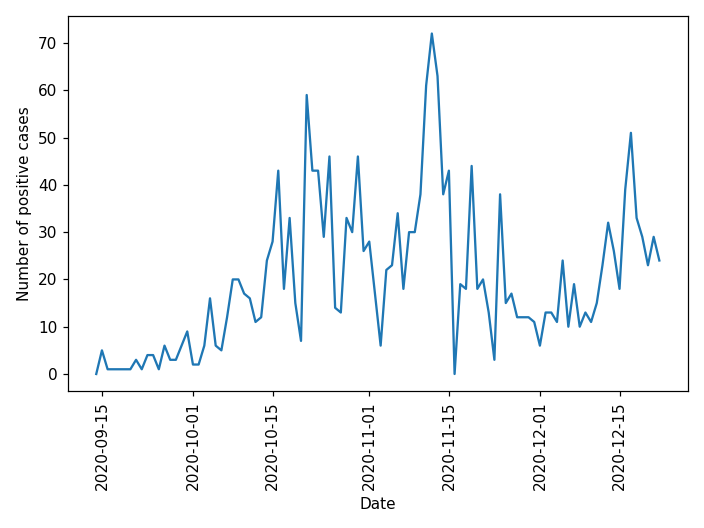

355


In [17]:
raw_data_dict = json.loads(raw_data)

data_dates = {}
for k in raw_data_dict['body']:
    data_dates[k['date']] = k['newCasesByPublishDate']

dates = np.array([datetime.datetime.strptime(k, '%Y-%m-%d') for k in data_dates])
nums = np.array([data_dates[k] for k in data_dates])

asrt = np.argsort(dates)
dates = dates[asrt]
nums = nums[asrt]

plt.figure()
plt.plot(dates[-100:], nums[-100:])
plt.xticks(rotation=90)

plt.xlabel('Date')
plt.ylabel('Number of positive cases')
plt.tight_layout()
print(len(dates))

In [ ]:
data_dates

In [ ]:
dir(raw)
print(raw.reason)
print(raw.ok)